In [1]:
import pandas as pd

In [3]:
dataset = pd.read_csv("../data/aemyjutt-diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
y = dataset.Outcome
x = dataset.drop("Outcome", axis=1)

x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Análise

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
x_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [19]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [20]:
x_scaled["Outcome"] = y

In [21]:
x_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


### Correlação

In [26]:
correlation = x_scaled.corr(method='spearman')
correlation["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.475776
BMI                         0.309707
Age                         0.309040
Pregnancies                 0.198689
DiabetesPedigreeFunction    0.175353
BloodPressure               0.142921
SkinThickness               0.089728
Insulin                     0.066472
Name: Outcome, dtype: float64

In [27]:
correlation = x_scaled.corr(method='kendall')
correlation["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.390565
Age                         0.257363
BMI                         0.253676
Pregnancies                 0.170370
DiabetesPedigreeFunction    0.143359
BloodPressure               0.119206
SkinThickness               0.076297
Insulin                     0.058531
Name: Outcome, dtype: float64

In [28]:
correlation = x_scaled.corr(method='pearson')
correlation["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### Importância da Variável

In [29]:
x_scaled = x_scaled.drop("Outcome", axis=1)

In [30]:
x_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


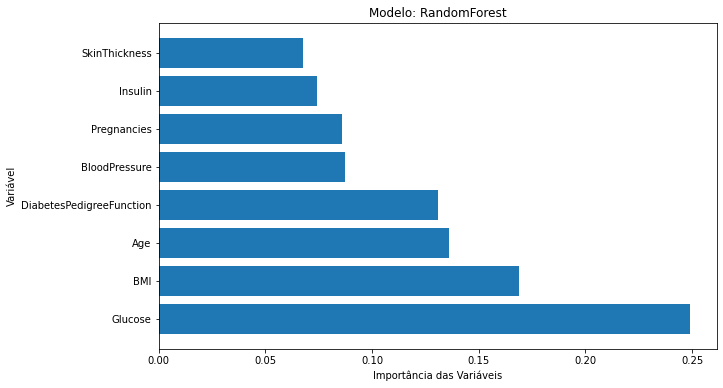

In [32]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

model = RandomForestClassifier(n_estimators=100)
model.fit(x_scaled, y)

importances = model.feature_importances_

indices = np.argsort(importances)[::-1]  
sorted_importances = importances[indices]
sorted_features = x_scaled.columns[indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importância das Variáveis')
plt.ylabel('Variável')
plt.title('Modelo: RandomForest')
plt.show()


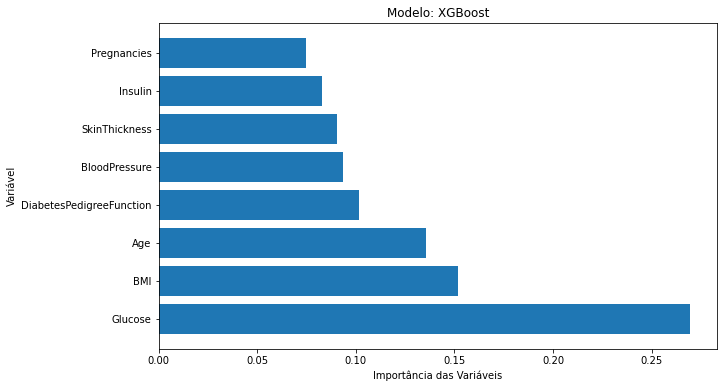

In [34]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

model = xgb.XGBClassifier(n_estimators=100)
model.fit(x_scaled, y)

importances = model.feature_importances_

indices = np.argsort(importances)[::-1]  
sorted_importances = importances[indices]
sorted_features = x_scaled.columns[indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importância das Variáveis')
plt.ylabel('Variável')
plt.title('Modelo: XGBoost')
plt.show()


### Treinamento de Modelos (Simples)

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, stratify=y, random_state=SEED)

dt_model = DecisionTreeClassifier(random_state=SEED)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds, average='binary')  
dt_recall = recall_score(y_test, dt_preds, average='binary')  


rf_model = RandomForestClassifier(n_estimators=100, random_state=SEED)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds, average='binary')  
rf_recall = recall_score(y_test, rf_preds, average='binary')  


xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=SEED)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds, average='binary')  
xgb_recall = recall_score(y_test, xgb_preds, average='binary')  

print("Acurácia: Número Total de Casos Corretos.")
print("Recall: De todos os casos com diabetes, quantos o modelo acertou?")
print("Precisão: De todos os casos que o modelos disse ser diabetes, quantos realmente eram?")

print(f"\nDecision Tree - Acurácia: {dt_accuracy:.4f}, Precisão: {dt_precision:.4f}, Recall: {dt_recall:.4f}")
print(f"\nRandom Forest - Acurácia: {rf_accuracy:.4f}, Precisão: {rf_precision:.4f}, Recall: {rf_recall:.4f}")
print(f"\nXGBoost - Acurácia: {xgb_accuracy:.4f}, Precisão: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}")


Acurácia: Número Total de Casos Corretos.
Recall: De todos os casos com diabetes, quantos o modelo acertou?
Precisão: De todos os casos que o modelos disse ser diabetes, quantos realmente eram?

Decision Tree - Acurácia: 0.7208, Precisão: 0.6341, Recall: 0.4815

Random Forest - Acurácia: 0.7597, Precisão: 0.6809, Recall: 0.5926

XGBoost - Acurácia: 0.7468, Precisão: 0.6531, Recall: 0.5926
